<a href="https://colab.research.google.com/github/amyylin1/Neural_Network_Charity_Analysis/blob/main/AlphabetSoupCharity_Optimzation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deliverable 1: Preprocessing the Data for a Neural Network

In [88]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  1. Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1.0,0,N,5000.0,1.0
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1.0,1-9999,N,108590.0,1.0
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1.0,0,N,5000.0,0.0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1.0,10000-24999,N,6692.0,1.0
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1.0,100000-499999,N,142590.0,1.0


In [89]:
# 2. Drop the non-beneficial ID columns, 'EIN' and 'NAME'
#application_df = application_df.drop(['EIN', 'NAME','SPECIAL_CONSIDERATIONS', 'USE_CASE', 'SPECIAL_CONSIDERATION'],1)
application_df = application_df.drop(['EIN', 'NAME'],1)
application_df

<ipython-input-89-2d971cbbb5e1>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  application_df = application_df.drop(['EIN', 'NAME'],1)


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1.0,0,N,5000.0,1.0
1,T3,Independent,C2000,Preservation,Co-operative,1.0,1-9999,N,108590.0,1.0
2,T5,CompanySponsored,C3000,ProductDev,Association,1.0,0,N,5000.0,0.0
3,T3,CompanySponsored,C2000,Preservation,Trust,1.0,10000-24999,N,6692.0,1.0
4,T3,Independent,C1000,Heathcare,Trust,1.0,100000-499999,N,142590.0,1.0
...,...,...,...,...,...,...,...,...,...,...
9995,T3,Independent,C4000,Preservation,Trust,1.0,100000-499999,N,80168.0,1.0
9996,T3,Independent,C1000,Preservation,Trust,1.0,100000-499999,N,55173.0,1.0
9997,T3,Independent,C1000,Preservation,Trust,1.0,100000-499999,N,187189.0,0.0
9998,T3,CompanySponsored,C2000,Preservation,Trust,1.0,25000-99999,N,12311.0,1.0


In [90]:
# 3. Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            13
AFFILIATION                  5
CLASSIFICATION              40
USE_CASE                     6
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   2542
IS_SUCCESSFUL                2
dtype: int64

In [91]:
# 4. Look at APPLICATION_TYPE value counts for binning
application_count = application_df.APPLICATION_TYPE.value_counts()
application_count

T3     7780
T4      408
T6      391
T8      388
T19     273
T10     266
T7      238
T5      176
T9       47
T13      19
T12       7
T2        6
T29       1
Name: APPLICATION_TYPE, dtype: int64

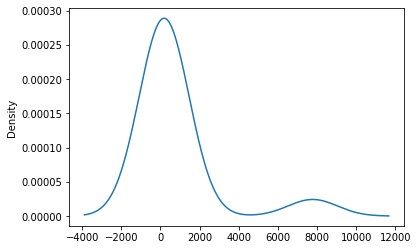

In [92]:
# 5. Visualize the value counts of APPLICATION_TYPE
application_count.plot.density()

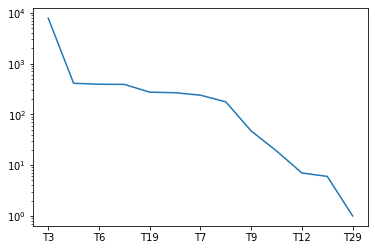

In [93]:
application_count.plot(logy=True)

In [94]:
# Determine which values to replace if counts are less than 1000?
replace_application = list(application_count[application_count < 1000].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       7780
Other    2220
Name: APPLICATION_TYPE, dtype: int64

In [95]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df.CLASSIFICATION.value_counts()
classification_count

C1000    5421
C2000    1862
C1200    1366
C3000     391
C2100     291
C7000     231
C1700     107
C4000      66
C5000      44
C2700      34
C7100      29
C1270      23
C2800      21
C7200      16
C1240      12
C2300      12
C1300       9
C7120       7
C1800       6
C1400       6
C8200       5
C1500       5
C1230       5
C7210       4
C1280       3
C6000       3
C8000       3
C1250       2
C1260       2
C2710       2
C4100       2
C1238       2
C2561       1
C1245       1
C1235       1
C1720       1
C1257       1
C4500       1
C2400       1
C8210       1
Name: CLASSIFICATION, dtype: int64

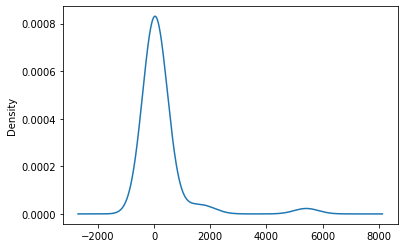

In [96]:
# Visualize the value counts of CLASSIFICATION
classification_count.plot.density()

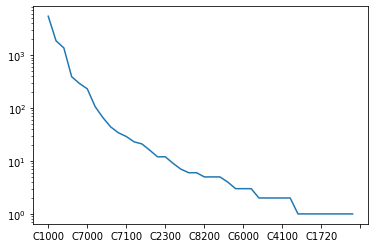

In [97]:
classification_count.plot(logy=True)

In [98]:
# Determine which values to replace if counts are less than 1000?
replace_class = list(classification_count[classification_count < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    5421
C2000    1862
C1200    1366
Other    1351
Name: CLASSIFICATION, dtype: int64

In [99]:
# check the data types of the dataframe
application_df.dtypes

APPLICATION_TYPE           object
AFFILIATION                object
CLASSIFICATION             object
USE_CASE                   object
ORGANIZATION               object
STATUS                    float64
INCOME_AMT                 object
SPECIAL_CONSIDERATIONS     object
ASK_AMT                   float64
IS_SUCCESSFUL             float64
dtype: object

In [100]:
# 7. Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [101]:
from IPython.utils.py3compat import encode

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,INCOME_AMT_nan,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,SPECIAL_CONSIDERATIONS_nan
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [102]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

<ipython-input-102-df1ed8563679>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  application_df = application_df.drop(application_cat, 1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Regional,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,INCOME_AMT_nan,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,SPECIAL_CONSIDERATIONS_nan
0,1.0,5000.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,108590.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,5000.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,6692.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,142590.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [103]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop(columns='IS_SUCCESSFUL')

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [104]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [105]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input = len(X_train_scaled[0])
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=40, activation='linear', input_dim=number_input))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=40, activation='sigmoid'))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=40, activation='relu'))

# Fourth hidden layer
nn_model.add(tf.keras.layers.Dense(units=20, activation='sigmoid'))

nn_model.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))
# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 40)                1520      
                                                                 
 dense_25 (Dense)            (None, 40)                1640      
                                                                 
 dense_26 (Dense)            (None, 40)                1640      
                                                                 
 dense_27 (Dense)            (None, 20)                820       
                                                                 
 dense_28 (Dense)            (None, 10)                210       
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,841
Trainable params: 5,841
Non-traina

In [106]:
# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model

In [107]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
235/235 [==============================] - 1s 2ms/step - loss: 0.6331 - accuracy: 0.6543
Epoch 2/100
235/235 [==============================] - 1s 2ms/step - loss: 0.6030 - accuracy: 0.6993
Epoch 3/100
235/235 [==============================] - 1s 2ms/step - loss: 0.5980 - accuracy: 0.6996
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.5898 - accuracy: 0.7040
Epoch 5/100
235/235 [==============================] - 1s 2ms/step - loss: 0.5826 - accuracy: 0.7067
Epoch 6/100
235/235 [==============================] - 1s 2ms/step - loss: 0.5789 - accuracy: 0.7109
Epoch 7/100
235/235 [==============================] - 1s 2ms/step - loss: 0.5767 - accuracy: 0.7128
Epoch 8/100
235/235 [==============================] - 1s 2ms/step - loss: 0.5754 - accuracy: 0.7127
Epoch 9/100
235/235 [==============================] - 1s 2ms/step - loss: 0.5749 - accuracy: 0.7132
Epoch 10/100
235/235 [==============================] - 1s 2ms/step - loss: 0.5740 - accura

In [108]:
#from google.colab import drive
#drive.mount('/content/drive')

In [109]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

79/79 - 0s - loss: nan - accuracy: 0.7124 - 238ms/epoch - 3ms/step
Loss: nan, Accuracy: 0.7124000191688538


In [110]:
# export the model to HDF5 file
nn_model.save('AlphabetSoupCharity_Optimization.h5')